/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_16899/4230339460.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=ax)


<Axes: ylabel='Density'>

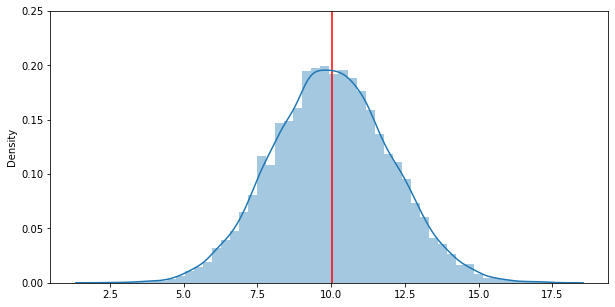

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))
v = stats.norm.rvs(loc=10, scale=2, size=10000)
w = stats.norm.rvs(loc=12, scale=2, size=10000)

m = np.mean(v)
ax.axvline(m, c = 'red')
plt.ylim(0, 0.25)
sns.distplot(v, ax=ax)

In [25]:
import findspark
#.init()で$SPARK_HOMEのパスを自動的に読み込む
findspark.init()

#pysparkに必要なライブラリを読み込む
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession

#spark sessionの作成
spark = SparkSession.builder \
    .appName("test") \
    .config("hive.exec.dynamic.partition", "true") \
    .config("hive.exec.dynamic.partition.mode", "nonstrict") \
    .config("spark.sql.session.timeZone", "JST") \
    .config("spark.ui.enabled","true") \
    .config("spark.eventLog.enabled","true") \
    .enableHiveSupport() \
    .getOrCreate()

spark.sql("show tables").show() 

spark.stop()
spark.sparkContext.stop()

23/09/24 23:46:09 WARN Utils: Your hostname, MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.11.3 instead (on interface en0)
23/09/24 23:46:09 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/24 23:46:09 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/09/24 23:46:13 WARN HiveConf: HiveConf of name hive.stats.jdbc.timeout does not exist
23/09/24 23:46:13 WARN HiveConf: HiveConf of name hive.stats.retries.wait does not exist
23/09/24 23:46:16 WARN ObjectStore: Version information not found in metastore. hive.metastore.schema.verification is not enabled so recording the schema version 2.3.0
23/09/24 23:46:16 WARN ObjectStore: setMetaStoreSchemaVersion called but recording version is disabled: version = 2.3.0, comment = Set by Met

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
+---------+---------+-----------+



In [26]:
import findspark
#.init()で$SPARK_HOMEのパスを自動的に読み込む
findspark.init()

#pysparkに必要なライブラリを読み込む
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType

#spark sessionの作成
spark = SparkSession.builder \
    .appName("test") \
    .config("hive.exec.dynamic.partition", "true") \
    .config("hive.exec.dynamic.partition.mode", "nonstrict") \
    .config("spark.sql.session.timeZone", "JST") \
    .config("spark.ui.enabled","true") \
    .config("spark.eventLog.enabled","true") \
    .enableHiveSupport() \
    .getOrCreate()

struct = StructType([
    StructField("test_column_A", StringType(), False),
    StructField("test_column_B", StringType(), False),

])
# csvデータ読み込み
df_csv = spark.read.option("multiline", "true").option("encoding", "UTF-8") \
    .csv("test.csv", header=False, sep=',', inferSchema=False, schema=struct)
df_csv.show()

spark.stop()
spark.sparkContext.stop()

AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/Users/kazuyaaoki/Desktop/programming/science/test.csv.

In [15]:
profit = [6.6, 12.7, 13.9, 13.3,10,8.9,7.1, 6.2, 5.1, 3.9,3,2.1,1.7,1.3,0.9,.9,.5,.4,.2,.2,1.2]
rng = ['100万円未満', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000-1100', '1100-1200', '1200-1300', '1300-1400', '1400-1500', '1500-1600', '1600-1700', '1700-1800', '1800-1900', '1900-2000', '2000万円以上']

print(len(profit))
print(len(rng))
df = pd.DataFrame(columns = ['年収', '割合'])
df.iloc[:, 0] = rng
df.iloc[:, 1] = profit
display(df)

21
21


,年収,割合
0,100万円未満,6.6
1,100-200,12.7
2,200-300,13.9
3,300-400,13.3
4,400-500,10
5,500-600,8.9
6,600-700,7.1
7,700-800,6.2
8,800-900,5.1
9,900-1000,3.9


21
21


,年収,割合
0,100万円未満,6.6
1,100-200,12.7
2,200-300,13.9
3,300-400,13.3
4,400-500,10
5,500-600,8.9
6,600-700,7.1
7,700-800,6.2
8,800-900,5.1
9,900-1000,3.9


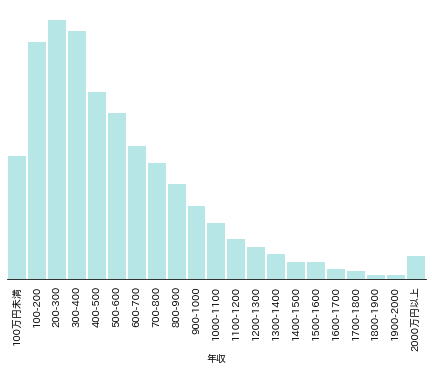

In [58]:
import japanize_matplotlib
import seaborn as sns

profit = [6.6, 12.7, 13.9, 13.3,10,8.9,7.1, 6.2, 5.1, 3.9,3,2.1,1.7,1.3,0.9,.9,.5,.4,.2,.2,1.2]
rng = ['100万円未満', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000-1100', '1100-1200', '1200-1300', '1300-1400', '1400-1500', '1500-1600', '1600-1700', '1700-1800', '1800-1900', '1900-2000', '2000万円以上']

print(len(profit))
print(len(rng))
df = pd.DataFrame(columns = ['年収', '割合'])
df.iloc[:, 0] = rng
df.iloc[:, 1] = profit
display(df)

fig = plt.figure(figsize = (7.5,5))
graph = sns.barplot(data = df, x = '年収' , y = '割合', width = 0.9, color = '#AFEEEE')
for item in graph.get_xticklabels():
    item.set_rotation(90)

graph.set_ylabel('')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, right=False, top=False,labelleft = False, bottom = False)

[None, None]

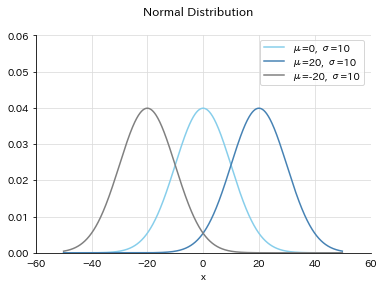

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

colors = ['skyblue','steelblue','grey']

mu = [0,20,-20] # mean
sd = 10 # standard deviation

X = np.arange(-50,50,0.1)

fig = plt.figure(figsize=(6, 4), facecolor='white')
fig.suptitle('Normal Distribution')

ax = fig.add_subplot(111,xlabel='x', ylabel='')

for i,m in enumerate(mu):
  # ここで正規分布を作成
  Y = scipy.stats.norm.pdf(X, loc=m, scale=sd)
  ax.plot(X, Y, c=colors[i], label=f"μ={m}, σ={sd}", zorder=10)

ax.tick_params(bottom=False)

ax.set_xlim(-60,60)
ax.set_ylim(0,.06)
ax.grid(axis='x', c='gainsboro', zorder=9)
ax.grid(axis='y', c='gainsboro', zorder=9)
ax.legend(bbox_to_anchor=(.98,.98), loc='upper right', borderaxespad=0)
[ax.spines[side].set_visible(False) for side in ['right','top']]

/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_16899/3498082791.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.frompyfunc(f, 1, 1)(np.zeros(n))).astype(np.float)


■ 平均：524.7点、標準偏差：196.0点
  ※ p=0.04 ( p<0.05 ) であり母集団には正規性があるとは言えない


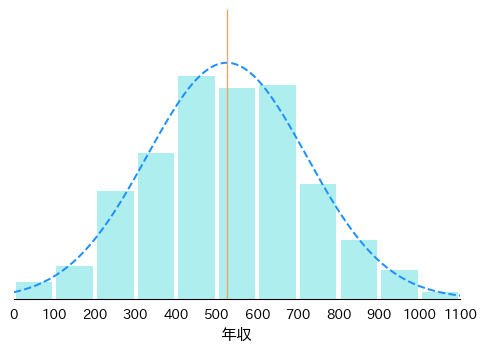

In [51]:
%reset -f
import numpy as np
import pandas as pd
import scipy.stats as st
import math                        
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import matplotlib.transforms as ts 

# 試験成績のダミーデータ（0～100の範囲の正規乱数（整数））を生成　
def getTestData(mu,sig,n) : # 平均mu、標準偏差sig、正規乱数の個数n
  f = lambda x: min(1000,max(0,round( np.random.normal(mu,sig),0)))
  return (np.frompyfunc(f, 1, 1)(np.zeros(n))).astype(np.float)

df = pd.DataFrame( {'p1':getTestData(527.5,200,1000)} )

# グラフ描画パラメータ
target = 'p1'           # データフレームのなかでプロット対象とする列
x_min, x_max = 0, 1100  # プロットする点数範囲（下限と上限）
j = 10                  # Y軸（度数）刻み幅
k = 100                   # 区間の幅
bins = 11             # 区間の数　(x_max-x_min)/k  (100-40)/5->12

# ここからグラフ描画処理
plt.figure(dpi=96)
plt.xlim(x_min,x_max)
d = 0.001

# (1) 統計処理
n   = len(df[target])         # 標本の大きさ 
mu  = df[target].mean()       # 平均
sig = df[target].std(ddof=0)  # 標準偏差：ddof(自由度)=0
print(f'■ 平均：{mu:.1f}点、標準偏差：{sig:.1f}点')
ci1, ci2 = (None, None)

# 正規性の検定（有意水準5%）と母平均の95%信頼区間
_, p = st.shapiro(df[target])
if p >= 0.05 :
  print(f'  - p={p:.2f} ( p>=0.05 ) であり母集団には正規性があると言える')
  U2 = df[target].var(ddof=1)  # 母集団の分散推定値（不偏分散）
  DF = n-1                     # 自由度
  SE = math.sqrt(U2/n)         # 標準誤差
  ci1,ci2 = st.t.interval( alpha=0.95, loc=mu, scale=SE, df=DF )
  print(f'  - 母平均の95%信頼区間CI = [{ci1:.2f} , {ci2:.2f}]')
else:
  print(f'  ※ p={p:.2f} ( p<0.05 ) であり母集団には正規性があるとは言えない')

# (2) ヒストグラムの描画
hist_data = plt.hist(df[target], bins=bins, color='#AFEEEE', range=(x_min, x_max), rwidth=0.9)
plt.gca().set_xticks(np.arange(x_min,x_max-k+d, k))

# (3) 正規分布を仮定した近似曲線
sig = df[target].std(ddof=1)  # 不偏標準偏差：ddof(自由度)=1
nx = np.linspace(x_min, x_max+d, 150) # 150分割
ny = st.norm.pdf(nx,mu,sig) * k * len(df[target])
plt.plot( nx , ny, color='#1E90FF', linewidth=1.5, linestyle='--')

# (4) X軸 目盛・ラベル設定
plt.xlabel('年収',fontsize=12)
plt.gca().set_xticks(np.arange(x_min,x_max+d, k))

# (5) Y軸 目盛・ラベル設定
y_max = max(hist_data[0].max(), st.norm.pdf(mu,mu,sig) * k * len(df[target]))
y_max = int(((y_max//j)+1)*j) # 最大度数よりも大きい j の最小倍数
plt.ylim(0,250)
# (6) 平均点と標準偏差のテキスト出力
plt.vlines( mu, 0, 250, color='#F4A460', linewidth=1 )

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, right=False, top=False,labelleft = False, bottom = False)

